In [45]:
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')


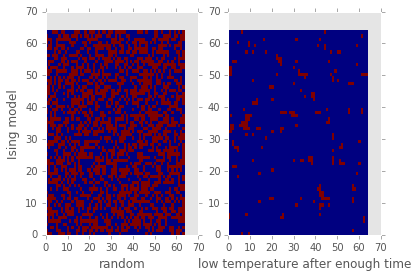

In [55]:
#low T

l = 64
T = 2.0
beta = 1/T

s= np.ones((l,l))

for i in range(l):
    for j in range(l):
        if random.random() > 0.5:
            s[i,j] = -s[i,j]
plt.subplot(1,2,1)
plt.pcolor(s)
plt.ylabel('Ising model')
plt.xlabel('random')
           
turns = 0

dE = np.zeros((l,l))
while turns < 300:
    turns = turns + 1
    for i in range(l):
        for j in range(l):
            dE[i,j] =  0.5 * 2 * s[i,j]*(s[(i-1)%l,j]+s[(i+1)%l,j]+s[i,(j-1)%l]+s[i,(j+1)%l])
            if dE[i,j]  < 0 or random.random() < np.exp(-2*beta* dE[i,j]):
                s[i,j] = - s[i,j]
plt.subplot(1,2,2)                
plt.pcolor(s)
plt.xlabel('low temperature after enough time')

In [61]:
np.mean(-dE/2)

-1.739013671875

In [62]:
def meanE(T,turns=300,lattice_size=64):
    beta = 1/T

    s= np.ones((l,l))

    for i in range(l):
        for j in range(l):
            if random.random() > 0.5:
                s[i,j] = -s[i,j]
    turns = 0

    dE = np.zeros((l,l))
    while turns < 300:
        turns = turns + 1
        for i in range(l):
            for j in range(l):
                dE[i,j] =  0.5 * 2 * s[i,j]*(s[(i-1)%l,j]+s[(i+1)%l,j]+s[i,(j-1)%l]+s[i,(j+1)%l])
                if dE[i,j]  < 0 or random.random() < np.exp(-2*beta* dE[i,j]):
                    s[i,j] = - s[i,j]
    return np.mean(-dE/2)
    

In [72]:
meanE(3.0)

-0.8232421875

In [68]:
Ts = np.arange(0.2,15,0.2)
len(Ts), Ts[0]

(74, 0.20000000000000001)

In [77]:
meanEs = []

for i in Ts:
    meanEs=meanEs+[meanE(i)]

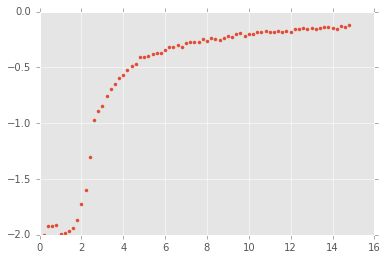

In [96]:
plt.plot(Ts,meanEs,'.')

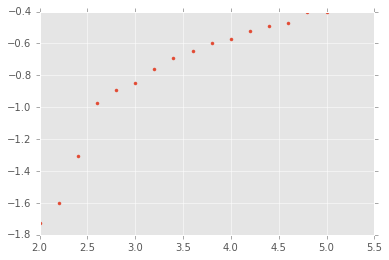

In [95]:
plt.plot(Ts[9:25],meanEs[9:25],'.')